In [1]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [5]:
import os

In [6]:
notebook_path = os.path.abspath("HW1.ipynb")

In [7]:
nlp_dataset = os.path.join(os.path.dirname(notebook_path), "socialmedia_relevant_cols.csv")

In [8]:
rawData = open(nlp_dataset).read()

In [9]:
rawData[0:500]

'text,choose_one,class_label\nJust happened a terrible car crash,Relevant,1\nOur Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Relevant,1\n"Heard about #earthquake is different cities, stay safe everyone.",Relevant,1\n"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",Relevant,1\nForest fire near La Ronge Sask. Canada,Relevant,1\nAll residents asked to \'shelter in place\' are being notified by officers. No other evacuation or shelter in'

In [10]:
rawData = rawData.replace(';', '').split('\n')

In [11]:
print(len(rawData))

12251


In [12]:
rawData.pop(0)

'text,choose_one,class_label'

In [13]:
text = list()
choose_one = list()
class_label = list()

In [14]:
for i in range(len(rawData)):
    rawData[i] = rawData[i][::-1].replace(",", "\n", 2)[::-1]
    res = rawData[i].split('\n')
    if len(res) == 3:
        text.append(res[0])
        choose_one.append(res[1])
        class_label.append(res[2])
    if len(res) == 2:
        text.append(res[0])
        choose_one.append(res[1])
        class_label.append('')
    if len(res) == 1:
        text.append(res[0])
        choose_one.append('')
        class_label.append('')

In [15]:
fullCorpus = pd.DataFrame({
    'text' : text,
    'choose_one' : choose_one,
    'class_label' : class_label
})
fullCorpus

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"""Heard about #earthquake is different cities, ...",Relevant,1
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
12245,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
12246,Police investigating after an e-bike collided ...,Relevant,1
12247,The Latest: More Homes Razed by Northern Calif...,Relevant,1
12248,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1


In [16]:
print("We have {} rows and {} columns in our dataset".format(len(fullCorpus), len(fullCorpus.columns)))

We have 12250 rows and 3 columns in our dataset


In [17]:
print(len(fullCorpus[fullCorpus['choose_one'] == 'Relevant']))

4673


In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuation(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

fullCorpus['clean_text'] = fullCorpus['text'].apply(lambda x: remove_punctuation(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text
0,Just happened a terrible car crash,Relevant,1,Just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,Our Deeds are the Reason of this earthquake Ma...
2,"""Heard about #earthquake is different cities, ...",Relevant,1,Heard about earthquake is different cities sta...
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,there is a forest fire at spot pond geese are ...
4,Forest fire near La Ronge Sask. Canada,Relevant,1,Forest fire near La Ronge Sask Canada


In [20]:
import re

In [21]:
def tokenise(text):
    tokens = re.split(r'\W+', text)
    return tokens

fullCorpus['tokenised_words'] = fullCorpus['clean_text'].apply(lambda x: tokenise(x.lower()))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words
0,Just happened a terrible car crash,Relevant,1,Just happened a terrible car crash,"[just, happened, a, terrible, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth..."
2,"""Heard about #earthquake is different cities, ...",Relevant,1,Heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi..."
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]"


In [22]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

fullCorpus['clean_text'] = fullCorpus['tokenised_words'].apply(lambda x: remove_stopwords(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words
0,Just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]","[just, happened, a, terrible, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[deeds, reason, earthquake, may, allah, forgiv...","[our, deeds, are, the, reason, of, this, earth..."
2,"""Heard about #earthquake is different cities, ...",Relevant,1,"[heard, earthquake, different, cities, stay, s...","[heard, about, earthquake, is, different, citi..."
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,"[forest, fire, spot, pond, geese, fleeing, acr...","[there, is, a, forest, fire, at, spot, pond, g..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"


In [23]:
ps = nltk.PorterStemmer()

In [24]:
def stemming(tokenised_words):
    text = [ps.stem(word) for word in tokenised_words]
    return text

fullCorpus['text_stemmed']  = fullCorpus['clean_text'].apply(lambda x: stemming(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words,text_stemmed
0,Just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]","[just, happened, a, terrible, car, crash]","[happen, terribl, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[deeds, reason, earthquake, may, allah, forgiv...","[our, deeds, are, the, reason, of, this, earth...","[deed, reason, earthquak, may, allah, forgiv, us]"
2,"""Heard about #earthquake is different cities, ...",Relevant,1,"[heard, earthquake, different, cities, stay, s...","[heard, about, earthquake, is, different, citi...","[heard, earthquak, differ, citi, stay, safe, e..."
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,"[forest, fire, spot, pond, geese, fleeing, acr...","[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, gees, flee, across,..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"


In [25]:
wn = nltk.WordNetLemmatizer()

In [26]:
def lemmatizing(tokenised_words):
    text = [wn.lemmatize(word) for word in tokenised_words]
    return text

fullCorpus['text_lemmatized'] = fullCorpus['clean_text'].apply(lambda x: lemmatizing(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words,text_stemmed,text_lemmatized
0,Just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]","[just, happened, a, terrible, car, crash]","[happen, terribl, car, crash]","[happened, terrible, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[deeds, reason, earthquake, may, allah, forgiv...","[our, deeds, are, the, reason, of, this, earth...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
2,"""Heard about #earthquake is different cities, ...",Relevant,1,"[heard, earthquake, different, cities, stay, s...","[heard, about, earthquake, is, different, citi...","[heard, earthquak, differ, citi, stay, safe, e...","[heard, earthquake, different, city, stay, saf..."
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,"[forest, fire, spot, pond, geese, fleeing, acr...","[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, gees, flee, across,...","[forest, fire, spot, pond, goose, fleeing, acr..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"


In [27]:
## сейчас в столбце clean_text находится токенизация по словам без стоп-слов

In [28]:
def tostr(clean_text):
    text = " ".join(clean_text)
    return text

fullCorpus['clean_text_full'] = fullCorpus['clean_text'].apply(lambda x: tostr(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words,text_stemmed,text_lemmatized,clean_text_full
0,Just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]","[just, happened, a, terrible, car, crash]","[happen, terribl, car, crash]","[happened, terrible, car, crash]",happened terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[deeds, reason, earthquake, may, allah, forgiv...","[our, deeds, are, the, reason, of, this, earth...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deeds reason earthquake may allah forgive us
2,"""Heard about #earthquake is different cities, ...",Relevant,1,"[heard, earthquake, different, cities, stay, s...","[heard, about, earthquake, is, different, citi...","[heard, earthquak, differ, citi, stay, safe, e...","[heard, earthquake, different, city, stay, saf...",heard earthquake different cities stay safe ev...
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,"[forest, fire, spot, pond, geese, fleeing, acr...","[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, gees, flee, across,...","[forest, fire, spot, pond, goose, fleeing, acr...",forest fire spot pond geese fleeing across str...
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada


In [29]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

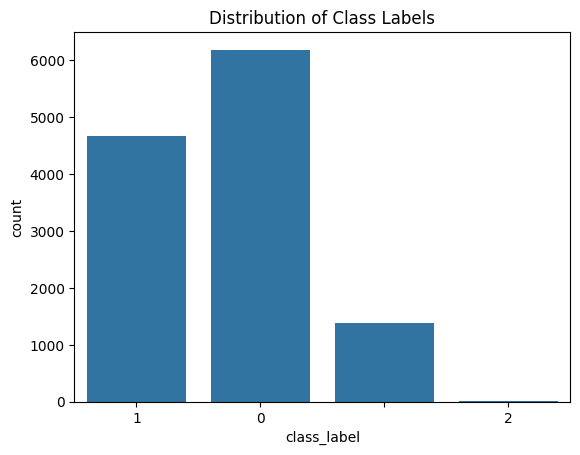

In [32]:
sns.countplot(x='class_label', data=fullCorpus)
plt.title('Distribution of Class Labels')
plt.show()

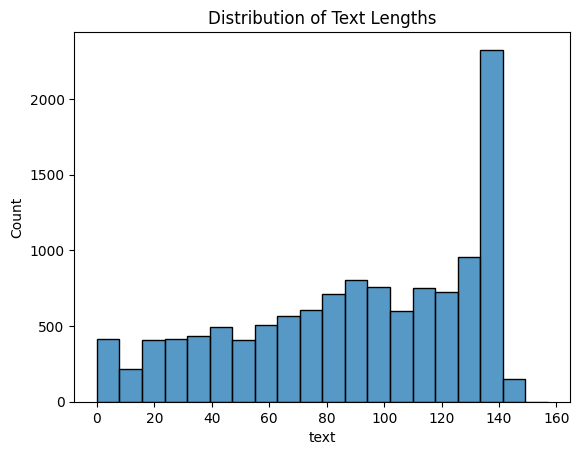

In [33]:
sns.histplot(fullCorpus['text'].apply(lambda x: len(x)), bins=20)
plt.title('Distribution of Text Lengths')
plt.show()

In [34]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

print("CountVectorizer:")
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(fullCorpus['clean_text_full'])
print(count_matrix.toarray())
print("Vocabulary:", count_vectorizer.get_feature_names_out())


print("\nTfidfVectorizer:")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(fullCorpus['clean_text_full'])
print(tfidf_matrix.toarray())
print("Vocabulary:", count_vectorizer.get_feature_names_out())

CountVectorizer:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary: ['00' '0011' '001116' ... 'ўthis' 'ўоѕdemolition' 'ўоѕnigeria']

TfidfVectorizer:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocabulary: ['00' '0011' '001116' ... 'ўthis' 'ўоѕdemolition' 'ўоѕnigeria']


In [36]:
X_tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
X_tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
X_tfidf_df

,00,0011,001116,0025,005225,010156,010217,010242,0104,010401,...,щp,ьў,ќmy,ќnatasharideout,ќyeah,ўif,ўim,ўthis,ўоѕdemolition,ўоѕnigeria
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432687,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
!pip install transformers


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!pip install torch


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from transformers import BertModel, BertTokenizer

In [40]:
model = BertModel.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\marga\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\marga\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\marga\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\marga\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\marga\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", 

In [42]:
words = " ".join(fullCorpus['clean_text_full'])

In [46]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer.tokenize(words)
tokens

['happened',
 'terrible',
 'car',
 'crash',
 'deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'heard',
 'earthquake',
 'different',
 'cities',
 'stay',
 'safe',
 'everyone',
 'forest',
 'fire',
 'spot',
 'pond',
 'geese',
 'fleeing',
 'across',
 'street',
 'cannot',
 'save',
 'forest',
 'fire',
 'near',
 'la',
 'ron',
 '##ge',
 'sas',
 '##k',
 'canada',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected',
 '1300',
 '##0',
 'people',
 'receive',
 'wild',
 '##fires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wild',
 '##fires',
 'pour',
 '##s',
 'school',
 'rocky',
 '##fire',
 'update',
 'california',
 'h',
 '##wy',
 '20',
 'closed',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'caf',
 '##ire',
 'wild',
 '##fires',
 'apocalypse',
 'lighting',
 'spokane',
 'wild',
 '##fires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'cau

In [47]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(token_ids)

token_ids = torch.tensor(token_ids).unsqueeze(0)

attention_mask = torch.tensor(attention_mask).unsqueeze(0)

[3047, 6659, 2482, 5823, 15616, 3114, 8372, 2089, 16455, 9641, 2149, 2657, 8372, 2367, 3655, 2994, 3647, 3071, 3224, 2543, 3962, 8644, 28519, 14070, 2408, 2395, 3685, 3828, 3224, 2543, 2379, 2474, 6902, 3351, 21871, 2243, 2710, 3901, 2356, 7713, 2173, 19488, 3738, 13982, 7713, 2173, 4449, 3517, 19527, 2692, 2111, 4374, 3748, 26332, 13982, 4449, 2662, 2288, 2741, 6302, 10090, 7397, 5610, 3748, 26332, 10364, 2015, 2082, 6857, 10273, 10651, 2662, 1044, 18418, 2322, 2701, 7826, 2349, 2697, 2221, 2543, 24689, 7442, 3748, 26332, 16976, 7497, 21878, 3748, 26332, 7186, 7071, 3082, 4542, 5320, 5956, 9451, 4534, 23624, 24826, 5169, 6076, 2752, 15393, 2061, 12672, 10626, 8563, 2654, 2859, 6629, 5513, 12762, 8372, 10047, 2327, 2940, 2156, 2543, 5249, 2045, 2015, 5057, 13982, 6230, 2311, 2408, 2395, 10047, 4452, 11352, 2746, 2181, 2093, 2111, 2351, 3684, 4400, 2521, 5292, 3270, 2148, 9925, 2893, 10361, 5292, 2232, 3524, 2117, 2444, 2148, 9925, 6069, 6069, 1042, 25465, 2243, 9451, 24057, 9451, 3516,

NameError: name 'torch' is not defined

In [50]:
import torch
token_ids = torch.tensor(token_ids).unsqueeze(0)

attention_mask = torch.tensor(attention_mask).unsqueeze(0)

output = model(token_ids, attention_mask = attention_mask)
output

RuntimeError: The expanded size of the tensor (208203) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [1, 208203].  Tensor sizes: [1, 512]